# Visualization with Seaborn
It is good to compare the use with pandas dataframe visualization. It is way simple and includes some unique plotting fuctions.
The basic structure of seaborn plotting is as follows:
* **sns.set_style()**
* **sns.plot(x, y, data, ax)**

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Bring titanic data
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Regression Plot (sns.regplot)

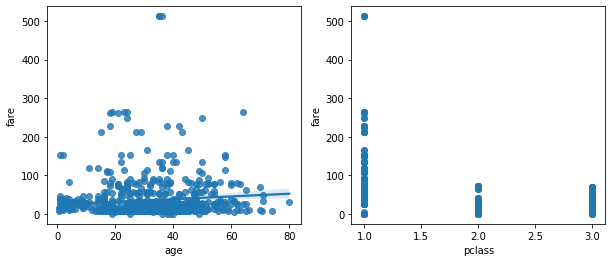

In [3]:
# Create subplot for 2 charts in
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(122)

# Regression plot - it should be written in one cell with above!
sns.regplot(x='age', y='fare', data=titanic, ax=ax1)
sns.regplot(x='pclass', y='fare', data=titanic, ax=ax2, fit_reg=False)    # fit_reg=F: NO regression line
plt.show()

## Distribution Plot (sns.distplot)
* **Histogram**
* **Gaussian Kernel Density Estimate** (sns.kdeplot)
* **Rugplot** (sns.rugplot): Displayed as marks along an axis to visualise the distribution of the data. Analogous to a histogram with zero-width bins, or a one-dimensional scatter plot.
* **Probability Distribution Function**

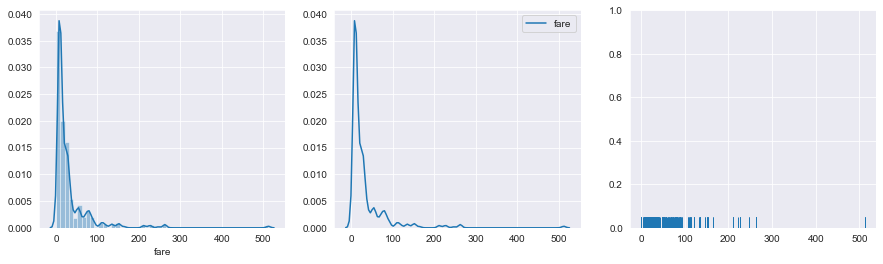

In [17]:
fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Distribution plot - can set hist, kde, rug at a plot
sns.distplot(titanic['fare'], ax=ax1)    # Data argument should be a Series!

# KDE plot
sns.kdeplot(titanic['fare'], ax=ax2)

# Rug plot
sns.rugplot(titanic['fare'], ax=ax3)
plt.show()

## Heatmap from Pivot Table (sns.heatmap)

In [5]:
# Draw pivot table from titanic data
pivot = titanic.pivot_table(index='sex', columns='class', aggfunc='size')
pivot

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


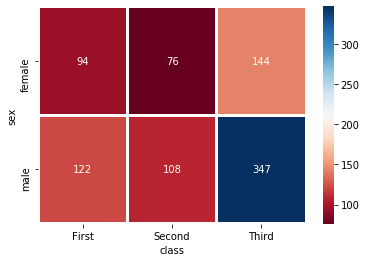

In [6]:
# Plot heatmap
sns.heatmap(pivot, annot=True, fmt='d',      # annot: data value is on the plot, fmt: string fomatting code
            cmap='RdBu', linewidth=2)        # line: separating line
plt.show()

## Bar Plot (sns.barplot)
Its y value shows the **mean of the column**(or other estimator).

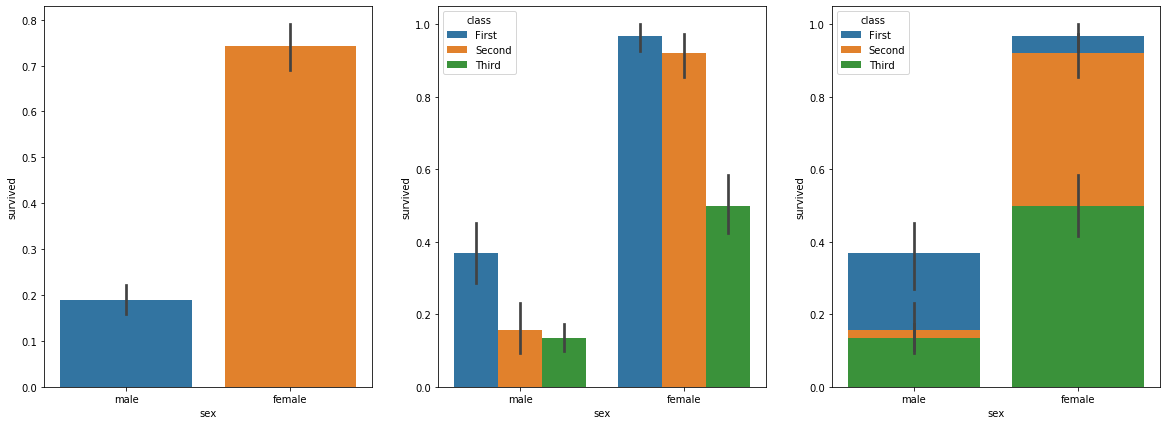

In [7]:
fig = plt.figure(figsize=(20, 7))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Box plot - default y estimator is mean
# estimator: can chose from numpy functions. Default is mean.
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1, estimator=np.mean)

# Add hue option
sns.barplot(x='sex', hue='class', y='survived', data=titanic, ax=ax2)

# Add dodge option to overlap - the height is overlapped not stacked!
sns.barplot(x='sex', hue='class', y='survived', data=titanic, dodge=False, ax=ax3)

plt.show()

The y value above is the survival rate.

## Count Plot (sns.countplot)
Its y value shows the **count of the column**. It is like a **histogram of categorical variables**, so **it only requires an independent variable** as the dependent variable is set to the count.

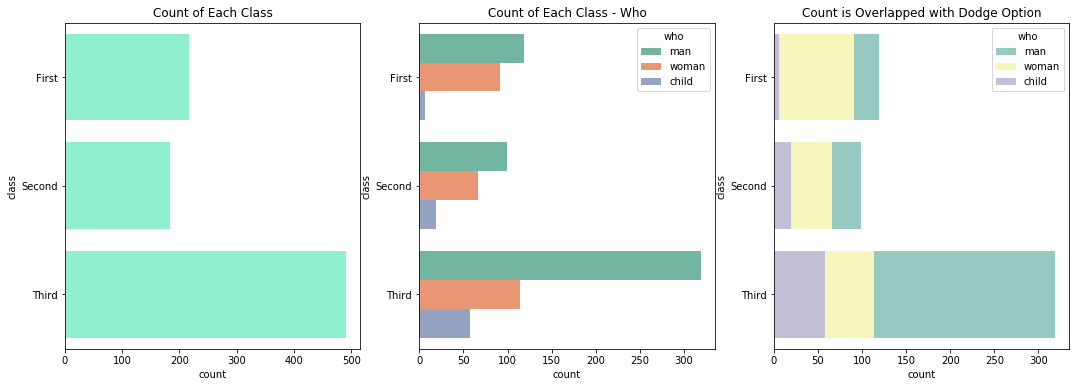

In [8]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Count plot - can't pass both x and y
sns.countplot(y='class', data=titanic, ax=ax1, color='aquamarine')    # Color: set a color for all bars

# Add hue option
sns.countplot(y='class', hue='who', data=titanic, ax=ax2, palette='Set2')

# Add dodge option to overlap
sns.countplot(y='class', hue='who', data=titanic, ax=ax3, dodge=False, palette='Set3')

# Set title
ax1.set_title('Count of Each Class')
ax2.set_title('Count of Each Class - Who')
ax3.set_title('Count is Overlapped with Dodge Option')

plt.show()

## Box Plot (sns.boxplot) / Violin Plot (sns.violinplot)
* Violin : Box Plot + Kernel Density Estimate

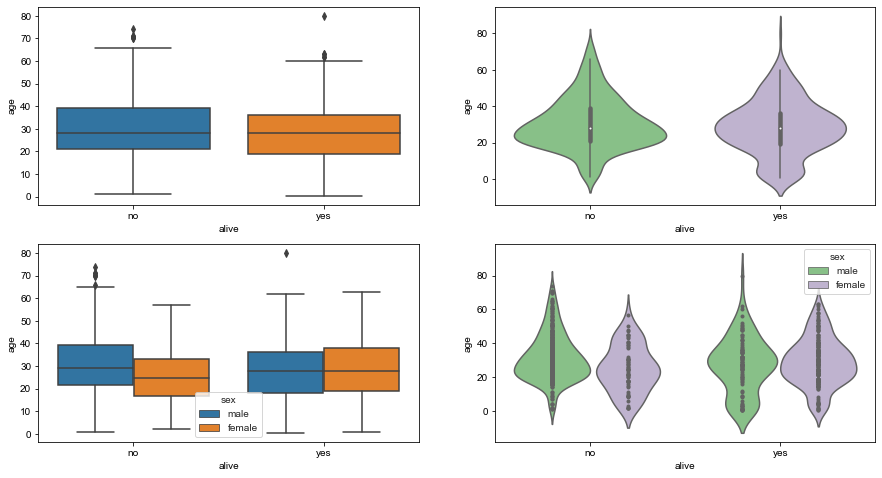

In [9]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(222)
ax4 = fig.add_subplot(224)

# Set grid style
sns.set_style('whitegrid')

# Box plot
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)

# Add hue to box plot
sns.boxplot(x='alive', hue='sex', y='age', data=titanic, ax=ax2)

# Violin plot
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3, palette='Accent')

# Add hue to violin plot
# inner: representation of the datapoints in the violin interior
sns.violinplot(x='alive', hue='sex', y='age', data=titanic, ax=ax4, palette='Accent', dodge=True, inner='point')

plt.show()

## Strip Plot (sns.stripplot) / Swarm Plot (sns.swarmplot)
Strip plot is a scatter plot of categorical variables. Swarm plot is a strip plot with non-overlapping points. Both are the complement of box plot and violin plot.
* **Strip/Swarm plot**: show all observations
* **Box/Violin plot**: some representation of the underlying distribution

C:\Users\sori-\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\sori-\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


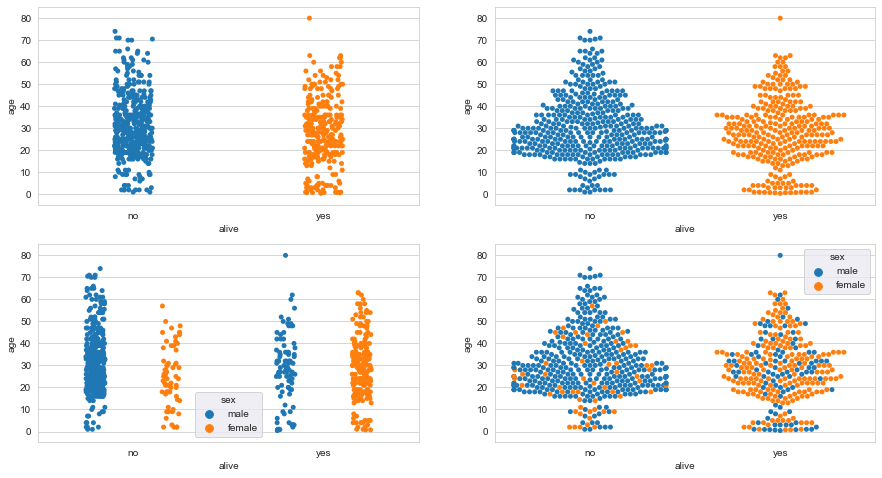

In [10]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(222)
ax4 = fig.add_subplot(224)

# Set grid style
sns.set_style('darkgrid')

# Strip plot
sns.stripplot(x='alive', y='age', data=titanic, ax=ax1)

# Add hue to strip plot
sns.stripplot(x='alive', hue='sex', y='age', data=titanic, ax=ax2, dodge=True)  # Default dodge here is False

# Swarm plot
sns.swarmplot(x='alive', y='age', data=titanic, ax=ax3)

# Add hue to swarm plot
sns.swarmplot(x='alive', hue='sex', y='age', data=titanic, ax=ax4)

plt.show()

## Point Plot (sns.pointplot)
It shows point estimates and confidence intervals using scatter plot glyphs.

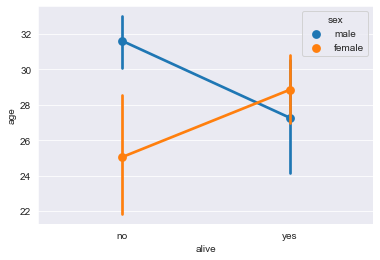

In [11]:
sns.pointplot(x='alive', hue='sex', y='age', data=titanic)